<hr style="border:2px solid black">

<h1><center>Final Project: Machine Learning</center><br><center>Module:Interview Preparation</center></h1>

<hr style="border:2px solid black">

## 1. Your views about the problem statement?

The problem statement focuses on predicting rainfall based on various weather-related parameters. This is a classical supervised learning problem where we need to classify whether it will rain the next day or not. The problem is highly practical and can help improve weather forecasts, impacting various industries. The challenge is to preprocess the data effectively and select models that can handle the complexity of the problem while providing accurate results.

<hr style="border:1px solid black">

## 2. What will be your approach to solving this task?

- Step 1: Load the dataset and perform data preprocessing (handle missing values, convert categorical variables into numerical ones).
- Step 2: Conduct exploratory data analysis (EDA) to understand the distribution of data and identify important features.
- Step 3: Train a Decision Tree model as a baseline classification model.
- Step 4: Use ensemble methods like Bagging (Random Forest), and Boosting (XG Boost) to improve the performance.
- Step 5: Evaluate models using accuracy, confusion matrix, precision, recall, and F1 score.
- Step 6: Compare the models and identify the best one.
- Step 7: Suggest ways to further improve the best-performing model.

<hr style="border:1px solid black">

## 3. What were the available ML model options you had to perform this task?

The available models for this task include:

- Logistic Regression: A linear model used for binary classification that predicts the probability of a binary outcome (e.g., rain or no rain). It is simple and interpretable but may not capture complex relationships between features.

- Linear Discriminant Analysis (LDA): A classification method that assumes normal distribution of the data and seeks to find a linear combination of features that best separates the classes.

- K-Nearest Neighbors (KNN): A non-parametric method that classifies a data point based on the majority class of its K-nearest neighbors in the feature space. KNN can work well with small datasets but may struggle with high-dimensional data and large datasets.

- Decision Tree Classifier: A tree-based algorithm that splits the data based on features and creates a tree-like structure for decision making. It is easy to interpret but can overfit the data without proper pruning.

- Bagging Classifier: A technique where multiple models (e.g., decision trees) are trained on random subsets of the data with replacement (bootstrap aggregating). This helps reduce variance and improves model stability.

- Random Forest Classifier: An ensemble method that builds multiple decision trees on different subsets of the data and averages their predictions. Random Forest helps reduce overfitting and usually provides better accuracy than a single decision tree.

- XGBoost Classifier (XGBClassifier): A gradient boosting algorithm that builds models sequentially, where each new model attempts to correct the errors of the previous ones. XGBoost is known for its high accuracy and efficiency in handling large datasets, often outperforming other algorithms in classification tasks.

- By trying out these different models, I will be able to compare their performances and select the best model based on metrics like accuracy, precision, recall, and F1 score.

<hr style="border:1px solid black">

## 4. Which model’s performance is best and what could be the possible reason for that?

In this case, both the <b>Decision Tree</b> and <b>XGBoost (XGBClassifier)</b> models may give good results, but <b>XGBoost</b> often performs better and should be preferred for several reasons:

- Higher accuracy: XGBoost typically provides better accuracy than a single decision tree due to its ability to reduce bias and variance. It sequentially builds trees, with each new tree focusing on correcting the errors of the previous ones, leading to more refined and accurate predictions.

- Handling of overfitting: Decision trees can easily overfit, especially when the tree is deep. XGBoost, on the other hand, incorporates regularization techniques (such as L1 and L2 regularization) that help prevent overfitting by penalizing overly complex models.

- Boosting methodology: While a decision tree is a single model, XGBoost uses boosting, a method that combines multiple weak learners (shallow trees) to create a strong learner. This process makes XGBoost highly effective, especially when there are complex patterns in the data.

- Speed and efficiency: XGBoost is designed to be computationally efficient. It has optimizations like parallel processing and better memory management, making it faster than traditional decision trees, particularly on large datasets.

- Handling missing values: XGBoost has built-in mechanisms to handle missing data efficiently, making it more robust compared to a standard decision tree that may struggle with incomplete data.

For these reasons, XGBoost is often preferred over a decision tree, especially in scenarios where accuracy and model robustness are critical. XGBoost can handle a wide variety of datasets with better generalization, making it a more powerful choice for this task.

<hr style="border:1px solid black">

## 5. What steps can you take to improve this selected model’s performance even further?

To improve the performance of the selected Random Forest model, the following steps can be taken:
- <b>Hyperparameter tuning</b>: Use GridSearchCV or RandomizedSearchCV to find the best hyperparameters for Random Forest or Gradient Boosting.
- <b>Regularization</b>: Apply regularization techniques to avoid overfitting in boosting algorithms.

<hr style="border:1px solid black">

#### Importing the Libraries

In [231]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score , recall_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

#### Reading the files/data

In [2]:
df= pd.read_excel('C:/Data Science/Interview Prep/Final Project/sydney_rain prediction.xlsx',header=0)

In [3]:
df.head()  #Printing the first 50 rows to see how our data looks for the df dataframe

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
1 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
2 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
3 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
4 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     20.7     20.9       Yes          Yes  
1     22.4     24.8       Yes          Yes  
2     23.5     23.0       Yes          Yes  
3     21.4     20.9       Yes          Yes  
4     22.5     25.5       Yes          Yes

In [4]:
# Converting yes and no to 1 and 0
df.RainToday = np.where(df.RainToday == 'Yes',1,0)
df.head(10)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
1 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
2 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
3 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
4 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   
5 2008-02-06   Sydney     20.2     27.2       1.6          2.6       8.6   
6 2008-02-07   Sydney     18.6     26.3       6.2          5.2       5.2   
7 2008-02-08   Sydney     17.2     22.3      27.6          5.8       2.1   
8 2008-02-09   Sydney     16.4     20.8      12.6          4.8       3.0   
9 2008-02-10   Sydney     14.6     24.2       8.8          4.4      10.1   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   
5         69.0         62.0       1002.7        998.6       6.0       6.0   
6         75.0         80.0        999.0       1000.3       4.0       7.0   
7         77.0         61.0       1008.3       1007.4       7.0       8.0   
8         92.0         91.0       1006.4       1007.6       7.0       7.0   
9         80.0         53.0       1014.0       1013.4       4.0       2.0   

   Temp9am  Temp3pm  RainToday RainTomorrow  
0     20.7     20.9          1          Yes  
1     22.4     24.8          1          Yes  
2     23.5     23.0          1          Yes  
3     21.4     20.9          1          Yes  
4     22.5     25.5          1          Yes  
5     23.8     26.0          1          Yes  
6     21.7     22.3          1          Yes  
7     18.9     21.1          1          Yes  
8     17.1     16.5          1          Yes  
9     17.2     23.3          1           No

In [5]:
# Converting yes and no to 1 and 0
df.RainTomorrow = np.where(df.RainTomorrow == 'Yes',1,0)
df.head(10)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
1 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
2 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
3 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
4 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   
5 2008-02-06   Sydney     20.2     27.2       1.6          2.6       8.6   
6 2008-02-07   Sydney     18.6     26.3       6.2          5.2       5.2   
7 2008-02-08   Sydney     17.2     22.3      27.6          5.8       2.1   
8 2008-02-09   Sydney     16.4     20.8      12.6          4.8       3.0   
9 2008-02-10   Sydney     14.6     24.2       8.8          4.4      10.1   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   
5         69.0         62.0       1002.7        998.6       6.0       6.0   
6         75.0         80.0        999.0       1000.3       4.0       7.0   
7         77.0         61.0       1008.3       1007.4       7.0       8.0   
8         92.0         91.0       1006.4       1007.6       7.0       7.0   
9         80.0         53.0       1014.0       1013.4       4.0       2.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  
0     20.7     20.9          1             1  
1     22.4     24.8          1             1  
2     23.5     23.0          1             1  
3     21.4     20.9          1             1  
4     22.5     25.5          1             1  
5     23.8     26.0          1             1  
6     21.7     22.3          1             1  
7     18.9     21.1          1             1  
8     17.1     16.5          1             1  
9     17.2     23.3          1             0

#### Data Preprocessing

In [6]:
df.info()  # getting a concise summary of the DataFrame, including the data types, non-null counts, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3337 non-null   int32   

- Most of the columns have many null values in it. In order to have a good performing model we need to remove these null values. Best would be to impute them with their mean

In [7]:
# imputing the columns with mean 
df=df.fillna(df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']].mean())

In [8]:
df.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [9]:
df.duplicated().sum()  # Checking for duplicate values

0

In [10]:
df.describe()  # getting the stattistical description of our dataframe

Date      MinTemp      MaxTemp     Rainfall  \
count                           3337  3337.000000  3337.000000  3337.000000   
mean   2012-10-16 01:24:34.737788672    14.865057    23.002339     3.330231   
min              2008-02-01 00:00:00     4.300000    11.700000     0.000000   
25%              2010-05-15 00:00:00    11.000000    19.600000     0.000000   
50%              2012-09-28 00:00:00    14.900000    22.800000     0.000000   
75%              2015-03-14 00:00:00    18.700000    26.000000     1.400000   
max              2017-06-25 00:00:00    27.600000    45.800000   119.400000   
std                              NaN     4.551593     4.493290     9.886270   

       Evaporation     Sunshine  Humidity9am  Humidity3pm  Pressure9am  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean      5.187432     7.179374    68.229010    54.699158  1018.346156   
min       0.000000     0.000000    19.000000    10.000000   986.700000   
25%       3.200000     4.300000    58.000000    44.000000  1013.800000   
50%       4.800000     8.200000    69.000000    56.000000  1018.500000   
75%       7.000000    10.200000    80.000000    64.000000  1023.100000   
max      18.400000    13.600000   100.000000    99.000000  1039.000000   
std       2.756095     3.801737    15.053668    16.261752     7.000492   

       Pressure3pm     Cloud9am     Cloud3pm      Temp9am      Temp3pm  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean   1016.018774     4.181523     4.218660    17.819742    21.533333   
min     989.800000     0.000000     0.000000     6.400000    10.200000   
25%    1011.300000     2.000000     2.000000    13.800000    18.400000   
50%    1016.300000     4.181523     4.218660    18.200000    21.300000   
75%    1020.800000     7.000000     7.000000    21.700000    24.500000   
max    1036.700000     9.000000     8.000000    36.500000    44.700000   
std       7.012157     2.505491     2.409531     4.894240     4.301156   

         RainToday  RainTomorrow  
count  3337.000000   3337.000000  
mean      0.259515      0.259215  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       1.000000      1.000000  
max       1.000000      1.000000  
std       0.438434      0.438269

In [11]:
#Last 1 year data
rainfall_last_year= df[df.Date > '2016-01-01']

<Figure size 1200x1800 with 0 Axes>

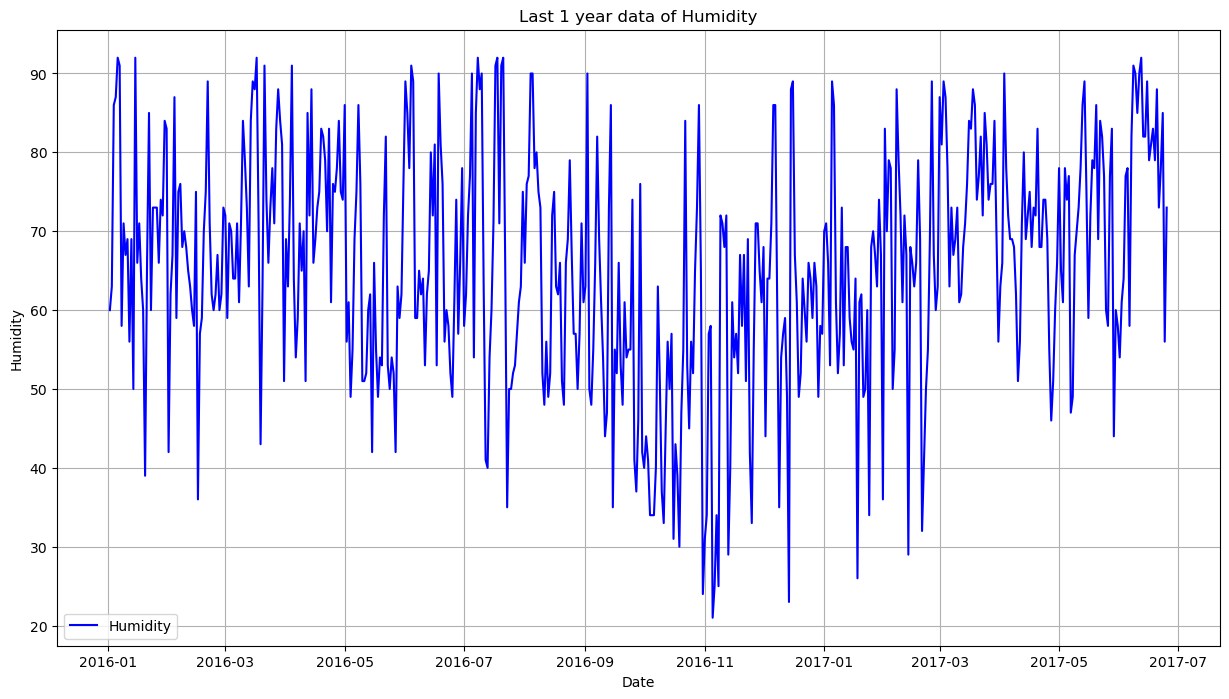

In [12]:
# Plot the rainfall trend over time for the last 1 year
plt.figure(figsize = (12,18))

plt.figure(figsize=(15,8))
plt.plot(rainfall_last_year['Date'], rainfall_last_year['Rainfall'], color='blue', label='Rainfall')
plt.title('Last 1 year data of Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(15,8))
plt.plot(rainfall_last_year['Date'], rainfall_last_year['Humidity9am'], color='blue', label='Humidity')
plt.title('Last 1 year data of Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(15,8))
plt.plot(rainfall_last_year['Date'], rainfall_last_year['Pressure9am'], color='blue', label='Pressure')
plt.title('Last 1 year data of Pressure')
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(15,8))
plt.plot(rainfall_last_year['Date'], rainfall_last_year['Temp9am'], color='blue', label='Temperature')
plt.title('Last 1 year data of Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend()
plt.show()

- So as clearly seen it rains heavily in the period March-April and June-August.
- High humidity levels often follow rainfall events, so you may see some correlation between humidity spikes and rainfall.
- Lower temperatures might follow periods of rainfall.There might be correlations between rainfall and temperature

In [14]:
# Let's find out the scatter plot of each variable with every other variable
plt.figure(figsize = (12,18))

sns.pairplot(df)
plt.show()

<Figure size 1200x1800 with 0 Axes>

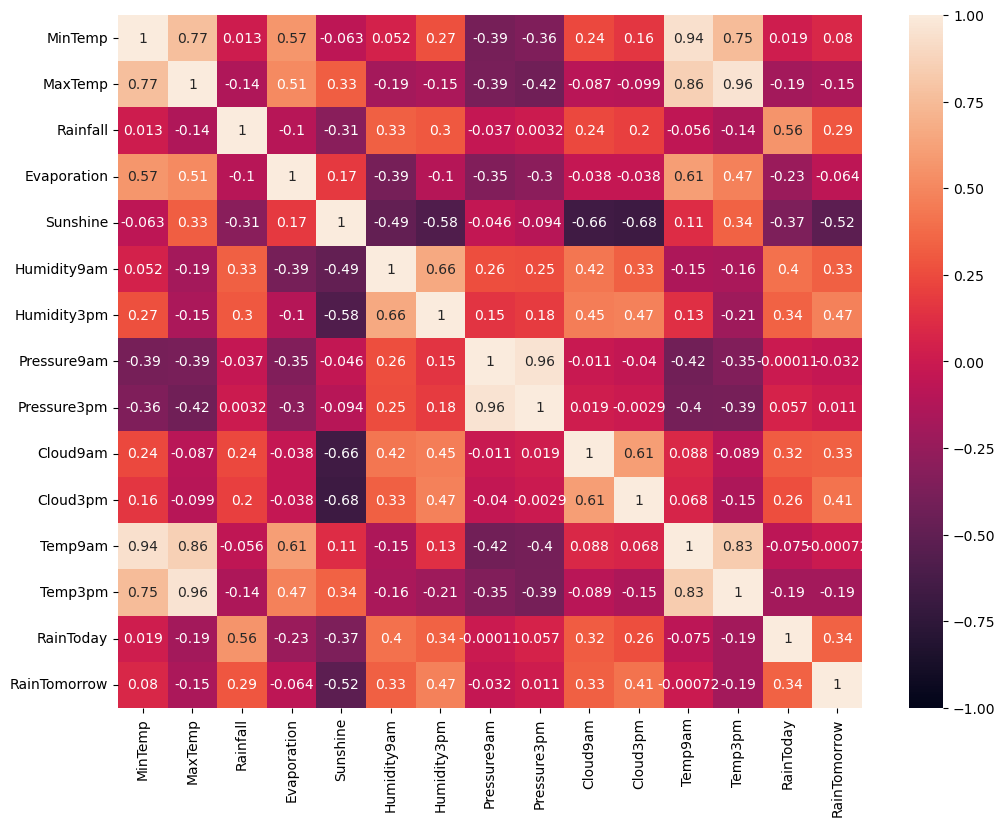

In [15]:
#Visualizing corr
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(numeric_only = True), annot = True, vmin = -1)
plt.show()


- Now, there are many variables which have high collinearity with each other and almost same collinearity with the target variable like temp9am, temp3pm, min_temp, max_temp etc.- 
Also, variables such as humidity, cloud, pressure are recorded 2 times a day, again they have similar collinearity. Hence, it is better to removf the columnswhich are not much usefule to make our data simple.

#### Removing extra variables

In [18]:
# creating a copy so that the changes does not affect the original dataframe
data= df.copy()

In [19]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [20]:
data=data.drop(['Date','MinTemp','MaxTemp','Evaporation','Humidity3pm','Pressure3pm','Cloud3pm','Temp9am','RainTomorrow'],axis=1)

In [21]:
data.Location.unique()

array(['Sydney'], dtype=object)

In [22]:
#Since the location column has a single value it won't be very usefull for our analysis
data=data.drop('Location', axis=1)

#### Detecting Outliers

In [24]:
data.shape

(3337, 7)

In [25]:
data.head()

Rainfall  Sunshine  Humidity9am  Pressure9am  Cloud9am  Temp3pm  RainToday
0      15.6       0.0         92.0       1017.6       8.0     20.9          1
1       6.0       2.7         83.0       1017.9       7.0     24.8          1
2       6.6       0.1         88.0       1016.7       7.0     23.0          1
3      18.8       0.0         83.0       1014.2       8.0     20.9          1
4      77.4       0.0         88.0       1008.3       8.0     25.5          1

In [26]:
data.plot(kind='box', figsize=(12, 15))
plt.show()

#### Removing Outliers

In [28]:
# we will use IQR to detect and remove outliers from the column 'Rainfall'
Q1 = np.percentile(data['Rainfall'], 25)
Q3 = np.percentile(data['Rainfall'], 75)
IQR = Q3 - Q1
print(IQR)

1.4


In [29]:
# let us now define the upper limit and the lower limit 
upper_limit = Q3 + 1.5*IQR 
lower_limit = Q1 - 1.5*IQR
print(upper_limit,lower_limit)

3.4999999999999996 -2.0999999999999996


In [30]:
# upper bound
upper_limit = Q3 + 1.5*IQR
upper_array = np.array(data['Rainfall'] >= upper_limit)
print("Upper Bound:", upper_limit)
print('Total Outliers: ',upper_array.sum())
 
# Below Lower bound
lower_limit = Q1-1.5*IQR
lower_array = np.array(data['Rainfall'] <= lower_limit)
print("\nLower Bound:", lower_limit)
print('Total Outliers: ',lower_array.sum())

Upper Bound: 3.4999999999999996
Total Outliers:  612

Lower Bound: -2.0999999999999996
Total Outliers:  0


In [31]:
outliers = np.where(data['Rainfall'] >= upper_limit)[0]
outliers
# Removing the outliers
data=data.drop(outliers)
data.shape

(2725, 7)

In [32]:
data['Rainfall'].plot(kind='box', figsize=(12, 15))
plt.show()

In [33]:
# we will use IQR to detect and remove outliers from the column 'Humidity9am'
Q1 = np.percentile(data['Humidity9am'], 25)
Q3 = np.percentile(data['Humidity9am'], 75)
IQR = Q3 - Q1
print(IQR)

19.0


In [34]:
# let us now define the upper limit and the lower limit 
upper_limit = Q3 + 1.5*IQR 
lower_limit = Q1 - 1.5*IQR
print(upper_limit,lower_limit)

104.5 28.5


In [35]:
# upper bound
upper_limit = Q3 + 1.5*IQR
upper_array = np.array(data['Humidity9am'] >= upper_limit)
print("Upper Bound:", upper_limit)
print('Total Outliers: ',upper_array.sum())
 
# Below Lower bound
lower_limit = Q1-1.5*IQR
lower_array = np.array(data['Humidity9am'] <= lower_limit)
print("\nLower Bound:", lower_limit)
print('Total Outliers: ',lower_array.sum())

Upper Bound: 104.5
Total Outliers:  0

Lower Bound: 28.5
Total Outliers:  24


In [36]:
data=data[((data['Humidity9am']>lower_limit) & (data['Humidity9am']<upper_limit))]

In [37]:
data.shape

(2701, 7)

In [38]:
data['Humidity9am'].plot(kind='box', figsize=(12, 15))
plt.show()

In [39]:
# we will use IQR to detect and remove outliers from the column 'Temp3pm'
Q1 = np.percentile(data['Temp3pm'], 25)
Q3 = np.percentile(data['Temp3pm'], 75)
IQR = Q3 - Q1
print(IQR)

6.199999999999999


In [40]:
# let us now define the upper limit and the lower limit 
upper_limit = Q3 + 1.5*IQR 
lower_limit = Q1 - 1.5*IQR
print(upper_limit,lower_limit)

34.1 9.300000000000002


In [41]:
# upper bound
upper_limit = Q3 + 1.5*IQR
upper_array = np.array(data['Temp3pm'] >= upper_limit)
print("Upper Bound:", upper_limit)
print('Total Outliers: ',upper_array.sum())
 
# Below Lower bound
lower_limit = Q1-1.5*IQR
lower_array = np.array(data['Temp3pm'] <= lower_limit)
print("\nLower Bound:", lower_limit)
print('Total Outliers: ',lower_array.sum())

Upper Bound: 34.1
Total Outliers:  20

Lower Bound: 9.300000000000002
Total Outliers:  0


In [42]:
data=data[((data['Temp3pm']>lower_limit) & (data['Temp3pm']<upper_limit))]

In [43]:
data.shape

(2681, 7)

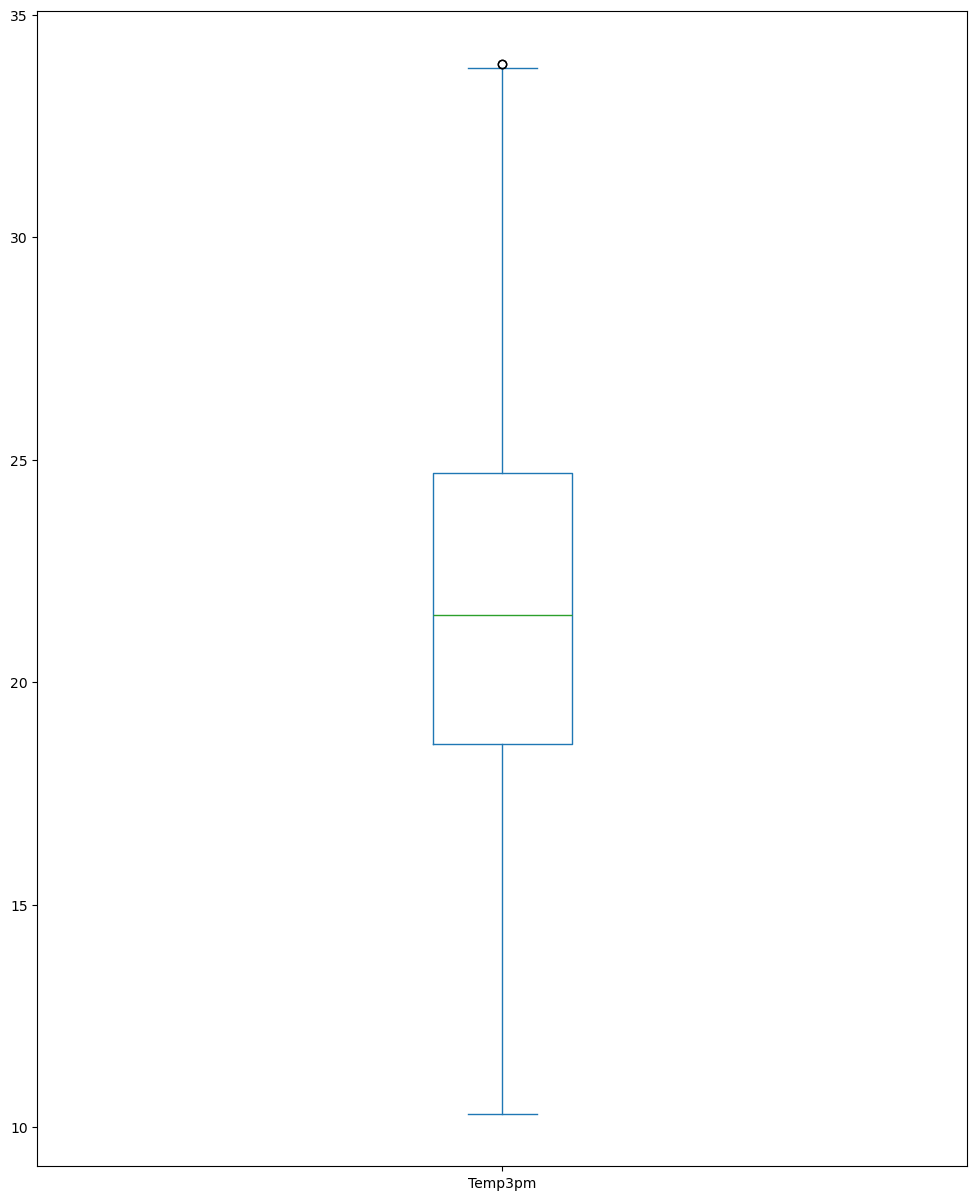

In [44]:
data['Temp3pm'].plot(kind='box', figsize=(12, 15))
plt.show()

In [45]:
# we will use IQR to detect and remove outliers from the column 'Pressure9am'
Q1 = np.percentile(data['Pressure9am'], 25)
Q3 = np.percentile(data['Pressure9am'], 75)
IQR = Q3 - Q1
print(IQR)

8.899999999999977


In [46]:
# let us now define the upper limit and the lower limit 
upper_limit = Q3 + 1.5*IQR 
lower_limit = Q1 - 1.5*IQR
print(upper_limit,lower_limit)

1036.45 1000.8500000000001


In [47]:
# upper bound
upper_limit = Q3 + 1.5*IQR
upper_array = np.array(data['Pressure9am'] >= upper_limit)
print("Upper Bound:", upper_limit)
print('Total Outliers: ',upper_array.sum())
 
# Below Lower bound
lower_limit = Q1-1.5*IQR
lower_array = np.array(data['Pressure9am'] <= lower_limit)
print("\nLower Bound:", lower_limit)
print('Total Outliers: ',lower_array.sum())

Upper Bound: 1036.45
Total Outliers:  6

Lower Bound: 1000.8500000000001
Total Outliers:  15


In [48]:
data=data[((data['Pressure9am']>lower_limit) & (data['Pressure9am']<upper_limit))]

In [49]:
data.shape

(2660, 7)

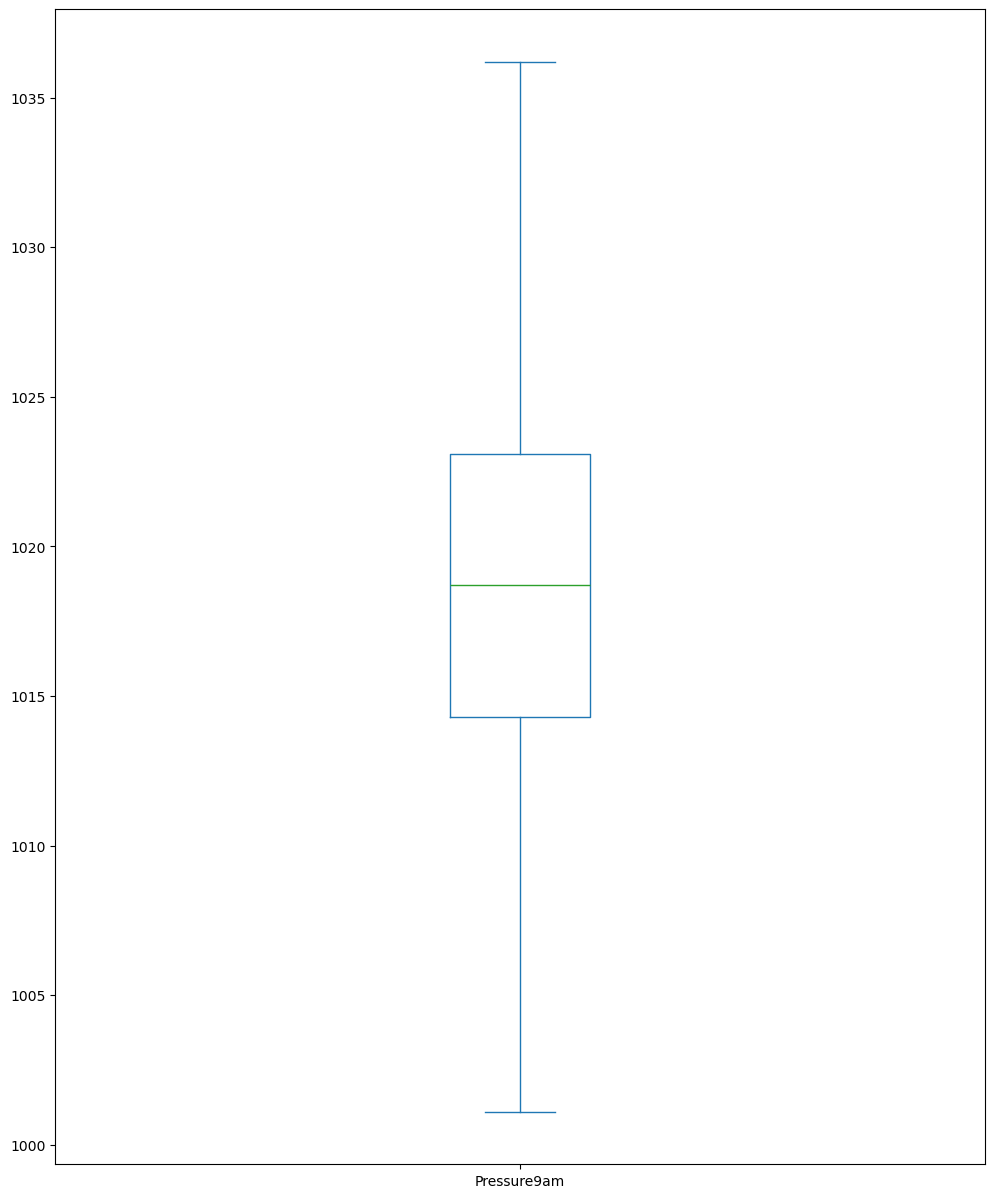

In [294]:
data['Pressure9am'].plot(kind='box', figsize=(12, 15))
plt.show()

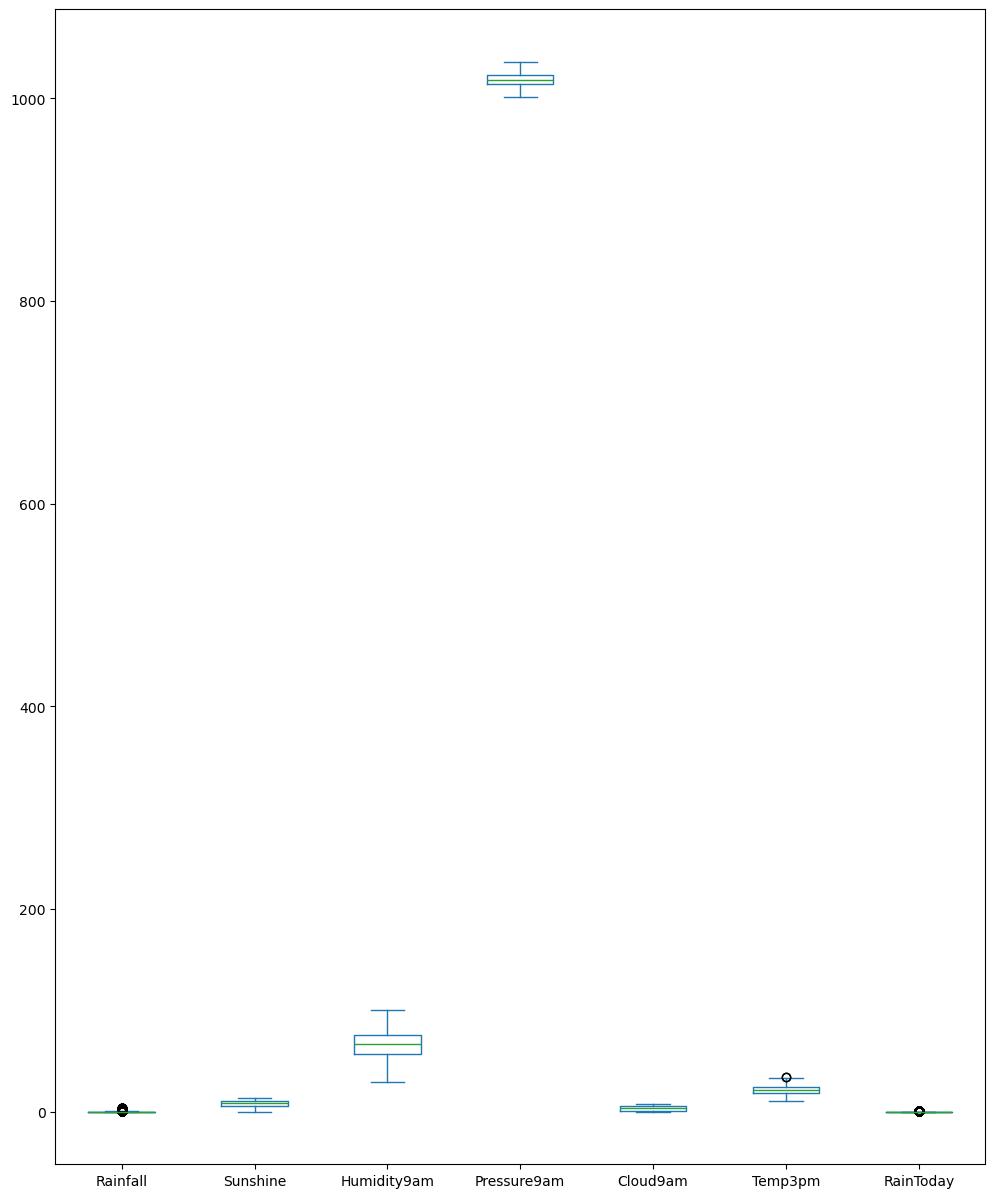

In [50]:
data.plot(kind='box', figsize=(12, 15))
plt.show()

- Most of the outliers have been removed

#### Splitting the data into Test and Train

In [53]:
X= data.drop('RainToday',axis=1)
X.head()

Rainfall  Sunshine  Humidity9am  Pressure9am  Cloud9am  Temp3pm
5        1.6       8.6         69.0       1002.7       6.0     26.0
10       0.0       8.0         78.0       1017.6       7.0     23.7
11       0.0       6.7         68.0       1010.7       7.0     24.7
13       3.0       8.7         81.0       1017.2       7.0     23.3
14       0.0       8.5         80.0       1020.2       7.0     23.8

In [54]:
y= data['RainToday']
y.head()

5     1
10    0
11    0
13    1
14    0
Name: RainToday, dtype: int32

In [55]:
#dividing the data into test and train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1000)

In [56]:
X_train.shape, X_test.shape

((2128, 6), (532, 6))

#### Normalization
- Since we have data of different scales, so in order to get proper fit we have to transform all the data within a range of values. - 
We will use a function called StandardScalar which transforms the data so that it makes mean = 0 and scales the data to unit variance for each predictive variable.

In [58]:
scaler = StandardScaler() 
X_train_s = scaler.fit_transform(X_train) 
X_test_s = scaler.transform(X_test) 

In [59]:
print(X_train_s,'\n\n\n\n''TEST', X_test_s)

[[-0.4033466   0.87984402 -2.16038294  0.53955054  0.12303327  1.04959982]
 [-0.4033466   0.99095586  0.44179638  0.49392931 -1.57161439  1.04959982]
 [ 4.23004094 -2.14795355  1.48266811 -0.96595007  1.67054919  0.11533848]
 ...
 [-0.4033466   0.68539831 -0.0042915  -0.159975   -1.16634395 -0.72057956]
 [-0.4033466  -0.09238456 -0.89646727 -0.78346515 -1.16634395  0.48412585]
 [-0.4033466   0.12983912  0.14440446  1.19345484 -0.35580305 -0.62223626]] 



TEST [[-0.4033466   1.26873545 -0.37603141  0.55475761 -0.7610735   0.04158101]
 [-0.4033466  -1.14794702  2.07745195  0.58517177  1.26527874 -1.45815429]
 [-0.4033466   0.8242881  -0.74777131  0.58517177 -1.16634395  1.02501399]
 ...
 [ 1.33417373  0.8242881   1.18527619 -0.159975   -0.35580305  1.24628641]
 [-0.4033466   0.29650687  1.18527619  0.50913638 -1.16634395  0.16451013]
 [-0.4033466  -0.9535013   1.18527619 -0.92032884  0.12303327  0.65622662]]


### Model Building

In [61]:
# LogisticRegression
# Initialize and fit the linear regression model
clf_lr = LogisticRegression()
clf_lr.fit(X_train_s, y_train)

LogisticRegression()

In [62]:
# Print the accuracy score, precision score, recall score and F1 score for training and testing data and confusion matrix for the model
print('Training')
print('Training Accuracy: ', accuracy_score(y_train, clf_lr.predict(X_train_s))) 
print('Precision Score: ', precision_score(y_train, clf_lr.predict(X_train_s)))
print('Recall Score: ', recall_score(y_train, clf_lr.predict(X_train_s)))
print('F1 Score:  ', f1_score(y_train, clf_lr.predict(X_train_s)))
print('\n')
print('Testing')
print('Testing Accuracy: ', accuracy_score(y_test, clf_lr.predict(X_test_s)))
print('Precision Score: ', precision_score(y_test, clf_lr.predict(X_test_s)))
print('Recall Score: ', recall_score(y_test, clf_lr.predict(X_test_s)))
print('F1 Score: ', f1_score(y_test, clf_lr.predict(X_test_s)))
print('Confusion Matrix: \n', confusion_matrix(y_test, clf_lr.predict(X_test_s)))

Training
Training Accuracy:  0.993421052631579
Precision Score:  0.9840425531914894
Recall Score:  0.9438775510204082
F1 Score:   0.9635416666666666


Testing
Testing Accuracy:  0.9868421052631579
Precision Score:  0.9411764705882353
Recall Score:  0.9230769230769231
F1 Score:  0.9320388349514563
Confusion Matrix: 
 [[477   3]
 [  4  48]]


In [63]:
#Plotting the Confusion Matrix
C_M=confusion_matrix(y_test, clf_lr.predict(X_test_s))
sns.heatmap(C_M, annot = True)
plt.show()


In [64]:
# LinearDiscriminantAnalysis
# Initialize and fit the LDA model
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train_s, y_train)

LinearDiscriminantAnalysis()

In [65]:
# Print the accuracy score, precision score, recall score and F1 score for training and testing data and confusion matrix for the model
print('Training')
print('Training Accuracy: ', accuracy_score(y_train, clf_lda.predict(X_train_s))) 
print('Precision Score: ', precision_score(y_train, clf_lda.predict(X_train_s)))
print('Recall Score: ', recall_score(y_train, clf_lda.predict(X_train_s)))
print('F1 Score: ', f1_score(y_train, clf_lda.predict(X_train_s)))
print('\n')
print('Testing')
print('Testing Accuracy: ', accuracy_score(y_test, clf_lda.predict(X_test_s)))
print('Precision Score: ', precision_score(y_test, clf_lda.predict(X_test_s)))
print('Recall Score: ', recall_score(y_test, clf_lda.predict(X_test_s)))
print('F1 Score: ', f1_score(y_test, clf_lda.predict(X_test_s)))
print('Confusion Matrix: \n', confusion_matrix(y_test, clf_lda.predict(X_test_s)))

Training
Training Accuracy:  0.9896616541353384
Precision Score:  0.9833333333333333
Recall Score:  0.9030612244897959
F1 Score:  0.9414893617021277


Testing
Testing Accuracy:  0.981203007518797
Precision Score:  0.9375
Recall Score:  0.8653846153846154
F1 Score:  0.9
Confusion Matrix: 
 [[477   3]
 [  7  45]]


In [66]:
#Plotting the Confusion Matrix
C_M1=confusion_matrix(y_test, clf_lda.predict(X_test_s))
sns.heatmap(C_M1, annot = True)
plt.show()

In [67]:
# KNeighborsClassifier
# Initialize and fit the KNN model
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_s, y_train)

KNeighborsClassifier()

In [68]:
# Print the accuracy score, precision score, recall score and F1 score for training and testing data and confusion matrix for the model
print('Training')
print('Training Accuracy: ', accuracy_score(y_train, clf_knn.predict(X_train_s))) 
print('Precision Score: ', precision_score(y_train, clf_knn.predict(X_train_s)))
print('Recall Score: ', recall_score(y_train, clf_knn.predict(X_train_s)))
print('F1 Score: ', f1_score(y_train, clf_knn.predict(X_train_s)))
print('\n')
print('Testing')
print('Testing Accuracy: ', accuracy_score(y_test, clf_knn.predict(X_test_s)))
print('Precision Score: ', precision_score(y_test, clf_knn.predict(X_test_s)))
print('Recall Score: ', recall_score(y_test, clf_knn.predict(X_test_s)))
print('F1 Score: ', f1_score(y_test, clf_knn.predict(X_test_s)))
print('Confusion Matrix: \n', confusion_matrix(y_test, clf_knn.predict(X_test_s)))

Training
Training Accuracy:  0.993890977443609
Precision Score:  0.9841269841269841
Recall Score:  0.9489795918367347
F1 Score:  0.9662337662337662


Testing
Testing Accuracy:  0.9793233082706767
Precision Score:  0.9361702127659575
Recall Score:  0.8461538461538461
F1 Score:  0.8888888888888888
Confusion Matrix: 
 [[477   3]
 [  8  44]]


In [69]:
#Plotting the Confusion Matrix
C_M2=confusion_matrix(y_test, clf_knn.predict(X_test_s))
sns.heatmap(C_M2, annot = True)
plt.show()

In [70]:
#DecisionTreeClassifier
# Initialize and fit the KNN model
clf_DTC = DecisionTreeClassifier()
clf_DTC.fit(X_train_s, y_train)

DecisionTreeClassifier()

In [71]:
# Print the accuracy score, precision score, recall score and F1 score for training and testing data and confusion matrix for the model
print('Training')
print('Training Accuracy: ', accuracy_score(y_train, clf_DTC.predict(X_train_s)))
print('Precision Score: ', precision_score(y_train, clf_DTC.predict(X_train_s)))
print('Recall Score: ', recall_score(y_train, clf_DTC.predict(X_train_s)))
print('F1 Score: ', f1_score(y_train, clf_DTC.predict(X_train_s)))
print('\n')
print('Testing')
print('Testing Accuracy: ', accuracy_score(y_test, clf_DTC.predict(X_test_s)))
print('Precision Score: ', precision_score(y_test, clf_DTC.predict(X_test_s)))
print('Recall Score: ', recall_score(y_test, clf_DTC.predict(X_test_s)))
print('F1 Score: ', f1_score(y_test, clf_DTC.predict(X_test_s)))
print('Confusion Matrix: \n', confusion_matrix(y_test, clf_DTC.predict(X_test_s)))

Training
Training Accuracy:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0


Testing
Testing Accuracy:  0.9981203007518797
Precision Score:  1.0
Recall Score:  0.9807692307692307
F1 Score:  0.9902912621359223
Confusion Matrix: 
 [[480   0]
 [  1  51]]


In [72]:
#Plotting the Confusion Matrix
C_M3=confusion_matrix(y_test, clf_DTC.predict(X_test_s))
sns.heatmap(C_M3, annot = True)
plt.show()

In [73]:
#Applying Bagging to the Decision Tree Classifier
bagging = BaggingClassifier(estimator=clf_DTC, n_estimators=100, random_state=42)
bagging.fit(X_train_s, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [74]:
# Print the accuracy score, precision score, recall score and F1 score for training and testing data and confusion matrix for the model
print('Training')
print('Training Accuracy: ', accuracy_score(y_train, bagging.predict(X_train_s))) 
print('Precision Score: ', precision_score(y_train, bagging.predict(X_train_s)))
print('Recall Score: ', recall_score(y_train, bagging.predict(X_train_s)))
print('F1 Score: ', f1_score(y_train, bagging.predict(X_train_s)))
print('\n')
print('Testing')
print('Testing Accuracy: ', accuracy_score(y_test, bagging.predict(X_test_s)))
print('Precision Score: ', precision_score(y_test, bagging.predict(X_test_s)))
print('Recall Score: ', recall_score(y_test, bagging.predict(X_test_s)))
print('F1 Score: ', f1_score(y_test, bagging.predict(X_test_s)))
print('Confusion Matrix: \n', confusion_matrix(y_test, bagging.predict(X_test_s)))

Training
Training Accuracy:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0


Testing
Testing Accuracy:  0.9962406015037594
Precision Score:  0.9629629629629629
Recall Score:  1.0
F1 Score:  0.9811320754716981
Confusion Matrix: 
 [[478   2]
 [  0  52]]


In [75]:
#Plotting the Confusion Matrix
C_M4=confusion_matrix(y_test, bagging.predict(X_test_s))
sns.heatmap(C_M4, annot = True)
plt.show()

In [76]:
#RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train_s,y_train)

RandomForestClassifier()

In [77]:
# Print the accuracy score, precision score, recall score and F1 score for training and testing data and confusion matrix for the model
print('Training')
print('Training Accuracy: ', accuracy_score(y_train, rf_clf.predict(X_train_s))) 
print('Precision Score: ', precision_score(y_train, rf_clf.predict(X_train_s)))
print('Recall Score: ', recall_score(y_train, rf_clf.predict(X_train_s)))
print('F1 Score: ', f1_score(y_train, rf_clf.predict(X_train_s)))
print('\n')
print('Testing')
print('Testing Accuracy: ', accuracy_score(y_test, rf_clf.predict(X_test_s)))
print('Precision Score: ', precision_score(y_test, rf_clf.predict(X_test_s)))
print('Recall Score: ', recall_score(y_test, rf_clf.predict(X_test_s)))
print('F1 Score: ', f1_score(y_test, rf_clf.predict(X_test_s)))
print('Confusion Matrix: \n', confusion_matrix(y_test, rf_clf.predict(X_test_s)))

Training
Training Accuracy:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0


Testing
Testing Accuracy:  0.9943609022556391
Precision Score:  0.9454545454545454
Recall Score:  1.0
F1 Score:  0.9719626168224299
Confusion Matrix: 
 [[477   3]
 [  0  52]]


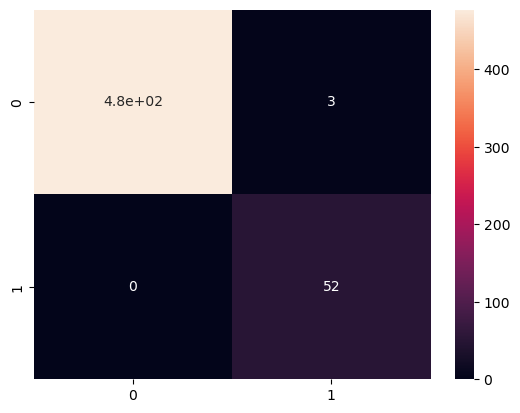

In [78]:
#Plotting the Confusion Matrix
C_M5=confusion_matrix(y_test, rf_clf.predict(X_test_s))
sns.heatmap(C_M5, annot = True)
plt.show()

In [79]:
#XGBClassifier
xgb_clf=XGBClassifier()
xgb_clf.fit(X_train_s,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
# Print the accuracy score, precision score, recall score and F1 score for training and testing data and confusion matrix for the model
print('Training')
print('Training Accuracy: ', accuracy_score(y_train, xgb_clf.predict(X_train_s))) 
print('Precision Score: ', precision_score(y_train, xgb_clf.predict(X_train_s)))
print('Recall Score: ', recall_score(y_train, xgb_clf.predict(X_train_s)))
print('F1 Score: ', f1_score(y_train, xgb_clf.predict(X_train_s)))
print('\n')
print('Testing')
print('Testing Accuracy: ', accuracy_score(y_test, xgb_clf.predict(X_test_s)))
print('Precision Score: ', precision_score(y_test, xgb_clf.predict(X_test_s)))
print('Recall Score: ', recall_score(y_test, xgb_clf.predict(X_test_s)))
print('F1 Score: ', f1_score(y_test, xgb_clf.predict(X_test_s)))
print('Confusion Matrix: \n', confusion_matrix(y_test, xgb_clf.predict(X_test_s)))

Training
Training Accuracy:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0


Testing
Testing Accuracy:  0.9981203007518797
Precision Score:  0.9811320754716981
Recall Score:  1.0
F1 Score:  0.9904761904761905
Confusion Matrix: 
 [[479   1]
 [  0  52]]


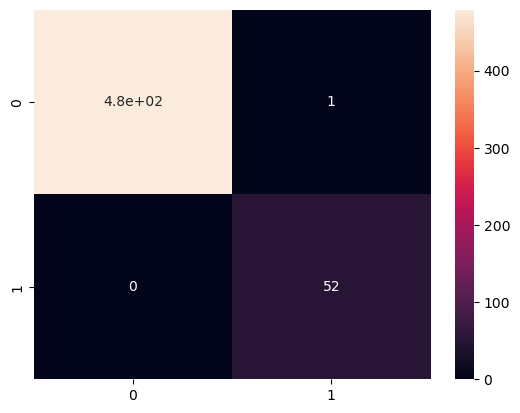

In [81]:
#Plotting the Confusion Matrix
C_M6=confusion_matrix(y_test, xgb_clf.predict(X_test_s))
sns.heatmap(C_M6, annot = True)
plt.show()

#### HyperParameter

In [233]:
# Building a XGBoost model using GridSearchCV
xgb = XGBClassifier(random_state = 100)

# Creating a dict of all the different parameter values that we want the model to build on.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}
# Using GridSearchCV to find out the best set of hyperparameters
grid_search = GridSearchCV(xgb, param_grid, n_jobs = -1, cv = 5, scoring = 'accuracy')

# Fitting our Grid search object
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=100, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [235]:
# Getting the best values for each hyperparameter
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}

In [237]:
# now we have a variable with optimum hyperparameter values
Op_xgb = grid_search.best_estimator_        

In [239]:
# Make predictions on the test data
y_pred = Op_xgb.predict(X_test_s)

# Evaluate the model
accuracy = Op_xgb.score(X_test_s, y_test)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [241]:
# Let's find out all the scores at once
print('Precision Score: ',precision_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('confusion matrix: ',confusion_matrix(y_test, y_pred))

Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
confusion matrix:  [[480   0]
 [  0  52]]


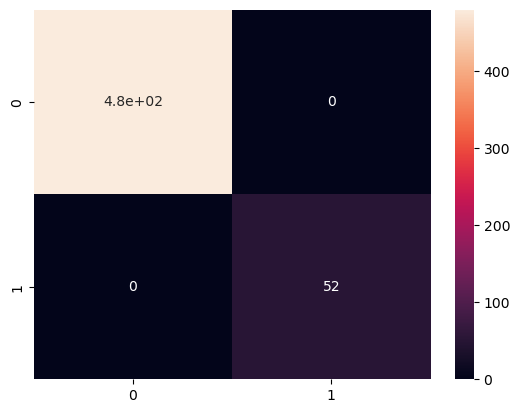

In [245]:
# plotting the confusion matrix again
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

<h1><center>Thank You!</center></h1>